### 2차원 연속형 확률변수 정의

- 결합확률밀도함수

   - 2차원 연속형 확률변수(X,Y)는 확률변수가 취할 수 있는 값의 조합

   - {(x,y)|a<=x<=b; c<=y<=d}

   - 정의역으로하는 결합확률밀도함수(f(x,y))에 의해 정의


- 2차원 연속형 확률변수의 확률 정의

   - x0<=X<=x1 및 y0<=Y<=y1를 만족하는 범위의 확률값

<br>

### 주변밀도함수

- 이미 X,Y로 정의된 결합확률밀도함수로부터 각 확률변수만의 특징 파악을 하고 싶을 때 활용

- Python 구현 시 2변수 함수 중 1변수만 적분하는 함수는 구현되지 않았기에 functools의 partial함수를 통해서 인수의 일부를 고정하여 새로운 함수 만들기

- partial(fxy,x)정의하면 x고정되고 인수가 y만으로된 함수 반환

<br>

###  2차원 연속형 확률변수의 지표

- 기대값

- 분산

- 공분산

In [1]:
#2차원 연속형 확률변수 정의

#f(x,y) = 4y(x-y) (0<=y<=1 및 0<=x-y<=1)
#f(x,y) = 0 (otherwise)

x_range = [0,2]
y_range = [0,1]

In [2]:
def f_xy(x,y):
    if 0<=y<=1 and 0<=x-y<=1:
        return 4*y*(x-y)
    else:
        return 0

In [3]:
XY = [x_range, y_range, f_xy]

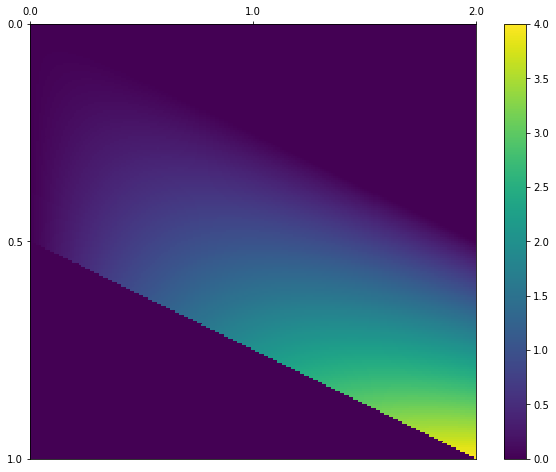

In [4]:
#시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0],y_range[1], 200)
pd = np.array([[f_xy(x,y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0,200,3), minor =False)
ax.set_yticks(np.linspace(0,200,3), minor=False)
ax.set_xticklabels(np.linspace(0,2,3))
ax.set_yticklabels(np.linspace(0,1,3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [ ]:
#첫번째 인수는 피적분함수, 두 번째 인수는 x의 적분구간과 y의 적분구간
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]
#1.000

In [ ]:
#partial(fxy,x)를 활용하여 integrate.quad적분

from functools import partial
 
def f_X(x):
    return integrate.quad(partial(f_xy,x), -np.inf,np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [ ]:
X = [x_range, f_X]
Y = [y_range, f_Y]

In [ ]:
#주변밀도함수 시각화

xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

In [ ]:
#확률변수 X의 기대값

def integrand(x,y):
    return x*f_xy(x,y)

integrate.nquad(integrand,
                [[-np.inf,np.inf],
                 [-np.inf,np.inf]])[0]

In [ ]:
#확률변수g(X,Y)기대값 계산함수 정의
def E(XY,g):
    x_range, y_range, f_xy =XY
    def integrand(x,y):
        return x*f_xy(x,y)

    return integrate.nquad(integrand,
                [[-np.inf,np.inf],
                 [-np.inf,np.inf]])[0]

In [ ]:
mean_X = E(XY, lambda x, y:x)
mean_X      

In [ ]:
mean_Y = E(XY, lambda x,y :y)
mean_Y

In [ ]:
#확률변수 2X+3Y의 기대값

#E(2X+3Y) = 2E(X)+3E(Y)

a,b =2,3
E(XY, lambda x, y: a*x + b*y)


In [ ]:
a * mean_X + b*mean_Y

In [ ]:
def integrand(x,y):
    return (x-mean_X) *2 * f_xy(x,y)

integrate.nquad(integrand,
                [[-np.inf,np.inf],
                 [-np.inf,np.inf]])[0]

In [ ]:
#g(X,Y)의 분산구현

def V(XY,g):
    x_range, y_range, f_xy =XY
    mean = E(XY,g)
    def integrand(x,y):
        return (g(x,y) -mean)**2 * f_xy(x,y)
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [ ]:
var_X = V(XY, lambda x, y:x)
var_X   

In [ ]:
var_Y = V(XY, lambda x, y:y)
var_Y

In [ ]:
#확률변수 X,Y의 상관관계를 알 수 있는 공분산 정의

def Cov(XY):
    x_range, y_range, f_xy =XY
    mean_X = E(XY, lambda x, y:x)
    mean_Y = E(XY, lambda x, y:y)
    def integrand(x,y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x,y)
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf,np.inf]])[0]

In [ ]:
cov_xy = Cov(XY)
cov_xy

In [ ]:
V(XY, lambda x,y : a*x + b*y)

In [ ]:
#V(2X+3Y) = 4V(X) + 9V(Y) + 12Cov(X,y)

a**2 * Var_X + b**2 + Var_Y + 2*a*b + cov_xy

In [ ]:
#상관계수 계산
cov_xy / np.sqrt(var_X * var_Y)